In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df_org = pd.read_csv('docs/t20_bbb.csv')

C:\Users\anees\AppData\Local\Temp\ipykernel_19736\1997786846.py:1: DtypeWarning: Columns (51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv('docs/t20_bbb.csv')


In [3]:
df_org=df_org[(df_org['ball']<=11)]
df_org=df_org[(df_org['over']<=20)]
df_org=df_org[(df_org['batruns']>=0) & (df_org['bowlruns']>=0)]
df_org.shape

(1675723, 57)

In [4]:
def bowl_style_clean(df,unique_styles):

    df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
    df['bowl_style'] = df['bowl_style'].replace(['LFM', 'LMF'], 'LFM')
    df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
    df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
    df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
    df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
    unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
           'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
           'RM/OB/LB']
    replacements = {
        'RFM': 'RFM',
        'RMF': 'RFM',
        'LFM': 'LFM',
        'LMF': 'LFM',
        'LBG': 'RWS',
        'LB': 'RWS',
        'LS': 'SLA',
        'SLA': 'SLA',
        'RAB': 'RS',
        'LAB': 'LS'
    }

    # Iterate over unique styles and apply replacements
    for style in unique_styles:
        replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
        df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
    #df['bowl_style'].unique()
    return df
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
df=bowl_style_clean(df_org,unique_styles)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'RM/OB',
       'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM', '-',
       'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LFM/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [5]:
df_worldcup = pd.read_csv('docs/2024 wc squad.csv', encoding='latin1')
df_worldcup.head()

Afghanistan       Australia             Bangladesh           Canada  \
0         Rashid Khan  Mitchell Marsh  Najmul Hossain Shanto   Saad Bin Zafar   
1      Ibrahim Zadran     Ashton Agar           Taskin Ahmed    Aaron Johnson   
2  Azmatullah Omarzai     Pat Cummins             Litton Das  Dillon Heyliger   
3   Najibullah Zadran       Tim David          Soumya Sarkar   Dilpreet Bajwa   
4      Mohammad Ishaq    Nathan Ellis           Tanzid Hasan     Harsh Thaker   

         England              India         Ireland             Namibia  \
0     Jos Buttler      Rohit Sharma   Paul Stirling     Gerhard Erasmus   
1       Moeen Ali     Hardik Pandya      Mark Adair          Zane Green   
2    Jofra Archer  Yashasvi Jaiswal      Ross Adair  Michael van Lingen   
3  Jonny Bairstow       Virat Kohli  Andy Balbirnie       Dylan Leicher   
4     Harry Brook  Suryakumar Yadav  Curtis Campher   Ruben Trumpelmann   

            Nepal     Netherlands        New Zealand               Oman  \
0    Rohit Paudel   Scott Edwards    Kane Williamson         Aqib Ilyas   
1    Aasif Sheikh      Aryan Dutt         Finn Allen    Zeeshan Maqsood   
2  Anil Kumar Sah    Bas de Leede        Trent Boult  Kashyap Prajapati   
3  Kushal Bhurtel  Saqib Zulfiqar  Michael Bracewell    Pratik Athavale   
4    Kushal Malla      Kyle Klein       Mark Chapman         Ayaan Khan   

  Papua New Guinea           Scotland      South Africa          Sri Lanka  \
0       Assad Vala  Richie Berrington     Aiden Markram  Wanindu Hasaranga   
1         Alei Nao      Matthew Cross  Ottniel Baartman   Charith Asalanka   
2       Chad Soper     Bradley Currie    Gerald Coetzee       Kusal Mendis   
3    Charles Amini      Chris Greaves   Quinton de Kock    Pathum Nissanka   
4        Hila Vare         Oli Carter     Bjorn Fortuin     Kamindu Mendis   

           Uganda   United States      West Indies         Pakistan  
0    Brian Masaba    Monank Patel    Rovman Powell       Babar Azam  
1   Simon Ssesazi     Aaron Jones   Alzarri Joseph     Fakhar Zaman  
2    Roger Mukasa    Andries Gous  Johnson Charles        Azam Khan  
3  Cosmas Kyewuta  Corey Anderson     Roston Chase   Iftikhar Ahmed  
4  Dinesh Nakrani        Ali Khan  Shimron Hetmyer  Mohammad Rizwan

In [6]:
team_dict = df_worldcup.to_dict(orient='list')

print(team_dict['Afghanistan'])

['Rashid Khan', 'Ibrahim Zadran', 'Azmatullah Omarzai', 'Najibullah Zadran', 'Mohammad Ishaq', 'Mohammad Nabi', 'Gulbadin Naib', 'Karim Janat', 'Nangeyalia Kharote', 'Mujeeb Ur Rahman', 'Noor Ahmad', 'Naveen-ul-Haq', 'Fazalhaq Farooqi', 'Fareed Ahmad', nan, nan]


In [7]:
team_dict = {key.strip(): [value.strip() for value in values if pd.notna(value)] for key, values in team_dict.items()}

team_dict['Afghanistan']

['Rashid Khan',
 'Ibrahim Zadran',
 'Azmatullah Omarzai',
 'Najibullah Zadran',
 'Mohammad Ishaq',
 'Mohammad Nabi',
 'Gulbadin Naib',
 'Karim Janat',
 'Nangeyalia Kharote',
 'Mujeeb Ur Rahman',
 'Noor Ahmad',
 'Naveen-ul-Haq',
 'Fazalhaq Farooqi',
 'Fareed Ahmad']

In [8]:
batter_list=df[['bat','p_bat']].drop_duplicates().rename(columns={"bat":"player_name","p_bat":"player_id"})
bowler_list=df[['bowl','p_bowl']].drop_duplicates().rename(columns={"bowl":"player_name","p_bowl":"player_id"})
player_list=pd.concat([batter_list,bowler_list],ignore_index=False).drop_duplicates()

In [9]:
player_groups=player_list.groupby(['player_name']).agg({'player_id':'count'})
player_groups=player_groups[player_groups['player_id']>1].sort_values('player_id',ascending=False).reset_index()
player_groups.rename(columns={'player_id':'count'},inplace=True)
player_groups[player_groups['player_name']=='Usman Khan']

player_name  count
40  Usman Khan      2

Finding the players who are not in the given dataset or the Names which is common for more than 1 player.

In [10]:
import pandas as pd

# Your existing code
players_list = np.concatenate((df['bowl'].unique(), df['bat'].unique()))

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Team', 'Player', 'Count'])

for team, players in team_dict.items():
    for player in players:
        if player not in players_list:
            temp_df = pd.DataFrame({'Team': [team], 'Player': [player], 'Count': ['Not in players_list']})
            results = pd.concat([results, temp_df], ignore_index=True)
        if player in player_groups['player_name'].unique():
            count = player_groups[player_groups['player_name'] == player]['count'].values[0]
            temp_df = pd.DataFrame({'Team': [team], 'Player': [player], 'Count': [count]})
            results = pd.concat([results, temp_df], ignore_index=True)

# Print the results
results


Team             Player                Count
0     Afghanistan        Rashid Khan                    2
1          Canada  Kanwarpal Tathgur  Not in players_list
2           India       Rohit Sharma                    2
3           Nepal     Anil Kumar Sah  Not in players_list
4     New Zealand     Daryl Mitchell                    2
5            Oman        Shoaib Khan                    2
6          Uganda        Ronak Patel                    2
7   United States           Ali Khan                    2
8   United States    Shayan Jahangir  Not in players_list
9        Pakistan          Azam Khan                    2
10       Pakistan         Usman Khan                    2

In [11]:
players=set()
for key,vals in team_dict.items():
    players.update(vals)

In [12]:
df_player_id_combs=df[['bat','p_bat','bowl','p_bowl']].drop_duplicates()

In [13]:
# Create a mapping of player names to player IDs
player_id_map = {}
for index, row in df_player_id_combs.iterrows():
    if row['bat'] in player_id_map:
        continue
    player_id_map[row['bat']] = row['p_bat']
    player_id_map[row['bowl']] = row['p_bowl']
# Initialize lists to store data
player_names = []
countries = []
player_ids = []

# Iterate over the dictionary
for country, players in team_dict.items():
    for player in players:
        player_names.append(player)
        countries.append(country)
        player_ids.append(player_id_map.get(player, None))

# Create DataFrame from lists
team_df = pd.DataFrame({'Player': player_names, 'Country': countries, 'p_id': player_ids})
team_df['p_id'] = team_df['p_id'].astype('Int64')
team_df.head()

Player      Country     p_id
0         Rashid Khan  Afghanistan   793463
1      Ibrahim Zadran  Afghanistan   921509
2  Azmatullah Omarzai  Afghanistan   819429
3   Najibullah Zadran  Afghanistan   524049
4      Mohammad Ishaq  Afghanistan  1076579

After crosschecking all the player names with multiple player ids, we found one player which is mapped to wrong player id.

In [14]:
team_df.loc[team_df['Player'] == 'Usman Khan', 'p_id'] = 1123428

Filtering the data of players who are included in the world cup.

In [15]:
matches_relevant=df[df['p_bat'].isin(team_df['p_id'].unique()) | df['p_bowl'].isin(team_df['p_id'].unique())]['p_match'].unique()
df=df[df['p_match'].isin(matches_relevant)]
df.shape

(1273918, 57)

In [16]:
worldcup_pitches=['Kensington Oval, Bridgetown, Barbados',
                  'Sir Vivian Richards Stadium, North Sound, Antigua',
                  'Providence Stadium, Guyana',
                  'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
                  'Brian Lara Stadium, Tarouba, Trinidad',
                  'Arnos Vale Ground, Kingstown, St Vincent',
                  'Central Broward Regional Park Stadium Turf Ground, Lauderhill',
                  'Nassau County International Cricket Stadium',
                  'Grand Prairie Stadium'
                 ]

In [17]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'noball', 'wide', 'byes', 'legbyes', 'cur_bat_runs',
       'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts', 'cur_bowl_runs',
       'inns_runs', 'inns_wkts', 'inns_balls', 'inns_runs_rem',
       'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target', 'max_balls', 'date',
       'year', 'ground', 'country', 'winner', 'toss', 'competition',
       'bat_hand', 'bowl_style', 'bowl_kind', 'batruns', 'ballfaced',
       'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone', 'line',
       'length', 'shot', 'control', 'predscore', 'wprob'],
      dtype='object')

In [18]:
def custom_agg(x):
    result = (x['batruns'].sum() * 120) / x['ballfaced'].sum()
    return round(result, 2)
def get_ground_avgscores(df):
    df1=df[df['ground'].isin(worldcup_pitches)].groupby(['p_match', 'inns','ground']).agg({'batruns':'sum','ballfaced':'sum'}).reset_index()
    # Define custom aggregation function
    # Group by 'inns' and 'ground', and aggregate using custom aggregation function
    result_df = df1.groupby(['ground']).apply(custom_agg).reset_index(name='average_score')

    return result_df
df_groundavg=get_ground_avgscores(df)
df_groundavg

ground  average_score
0              Brian Lara Stadium, Tarouba, Trinidad         140.95
1  Central Broward Regional Park Stadium Turf Gro...         153.98
2  Daren Sammy National Cricket Stadium, Gros Isl...         152.78
3              Kensington Oval, Bridgetown, Barbados         147.34
4                         Providence Stadium, Guyana         145.48
5  Sir Vivian Richards Stadium, North Sound, Antigua         134.26

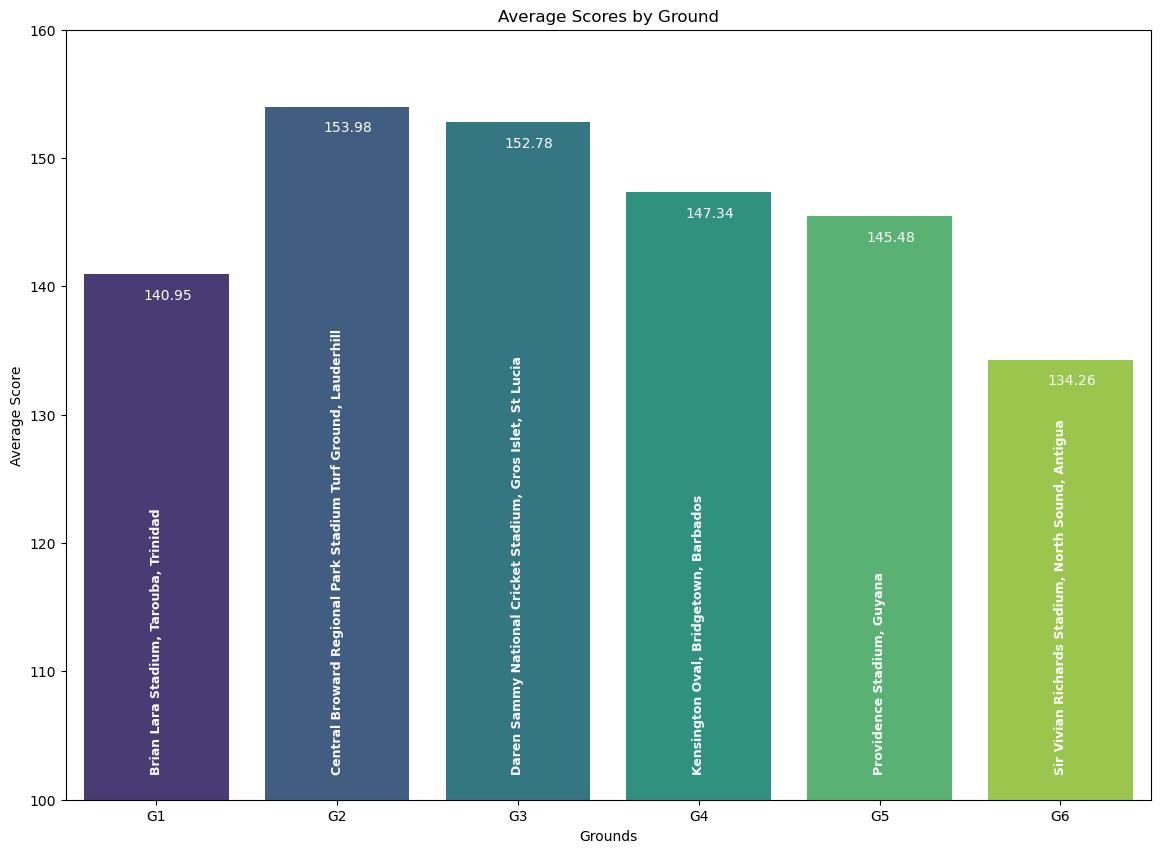

In [19]:
# Create a dictionary for ground indexes
ground_index = {ground: f'G{i}' for i, ground in enumerate(df_groundavg['ground'].unique(), 1)}

# Add the index to the dataframe
df_groundavg['ground_index'] = df_groundavg['ground'].map(ground_index)

plt.figure(figsize=(14, 10))

# Create the bar plot
ax = sns.barplot(x='ground_index', y='average_score', data=df_groundavg, palette='viridis')

#ax.set_ylim([100, None])

# Annotate bars with ground names outside and scores inside
for p, label in zip(ax.patches, df_groundavg['ground']):
    height = p.get_height()
    ax.annotate(format(height, '.2f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (8, -15), 
                textcoords = 'offset points', color='white')
    
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., 102), 
                ha = 'center', va = 'bottom', 
                fontsize=9, rotation=90, color='white',weight="bold")

# Title and labels
plt.ylim(100,160)
plt.title('Average Scores by Ground')
plt.xlabel('Grounds')
plt.ylabel('Average Score')

# # Create the legend for ground names
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, ['Innings 1', 'Innings 2'], title='Innings')

plt.show()

In [20]:
df_groundavg.to_csv('docs/WC Analysis results/scoreavg_ground.csv')

In [21]:
def get_ground_batstats_vs_bowlkind(df):
    df2=df[(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))]
    df2_runs=df2.groupby(['ground','bowl_kind']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df2_outs=df[(df['out']==True)&(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))].groupby(['ground','bowl_kind']).size().reset_index(name='outs')
    df2_batting=pd.merge(df2_runs,df2_outs,on=['ground','bowl_kind'])
    df2_batting['average']=round(df2_batting['batruns']/df2_batting['outs'],2)
    df2_batting['strike rate']=round(df2_batting['batruns']*100/df2_batting['ballfaced'],2)
    df2_batting.drop(columns=['batruns','ballfaced','outs'],inplace=True)
    df2_batting.rename(columns={'p_match':'matches'},inplace=True)
    return df2_batting
df2_batting=get_ground_batstats_vs_bowlkind(df)
df2_batting.head()

ground    bowl_kind  matches  \
0              Brian Lara Stadium, Tarouba, Trinidad  pace bowler       43   
1              Brian Lara Stadium, Tarouba, Trinidad  spin bowler       43   
2  Central Broward Regional Park Stadium Turf Gro...  pace bowler       21   
3  Central Broward Regional Park Stadium Turf Gro...  spin bowler       21   
4  Daren Sammy National Cricket Stadium, Gros Isl...  pace bowler       15   

   average  strike rate  
0    20.98       128.26  
1    20.71       106.38  
2    25.00       138.15  
3    23.08       113.52  
4    20.67       131.66

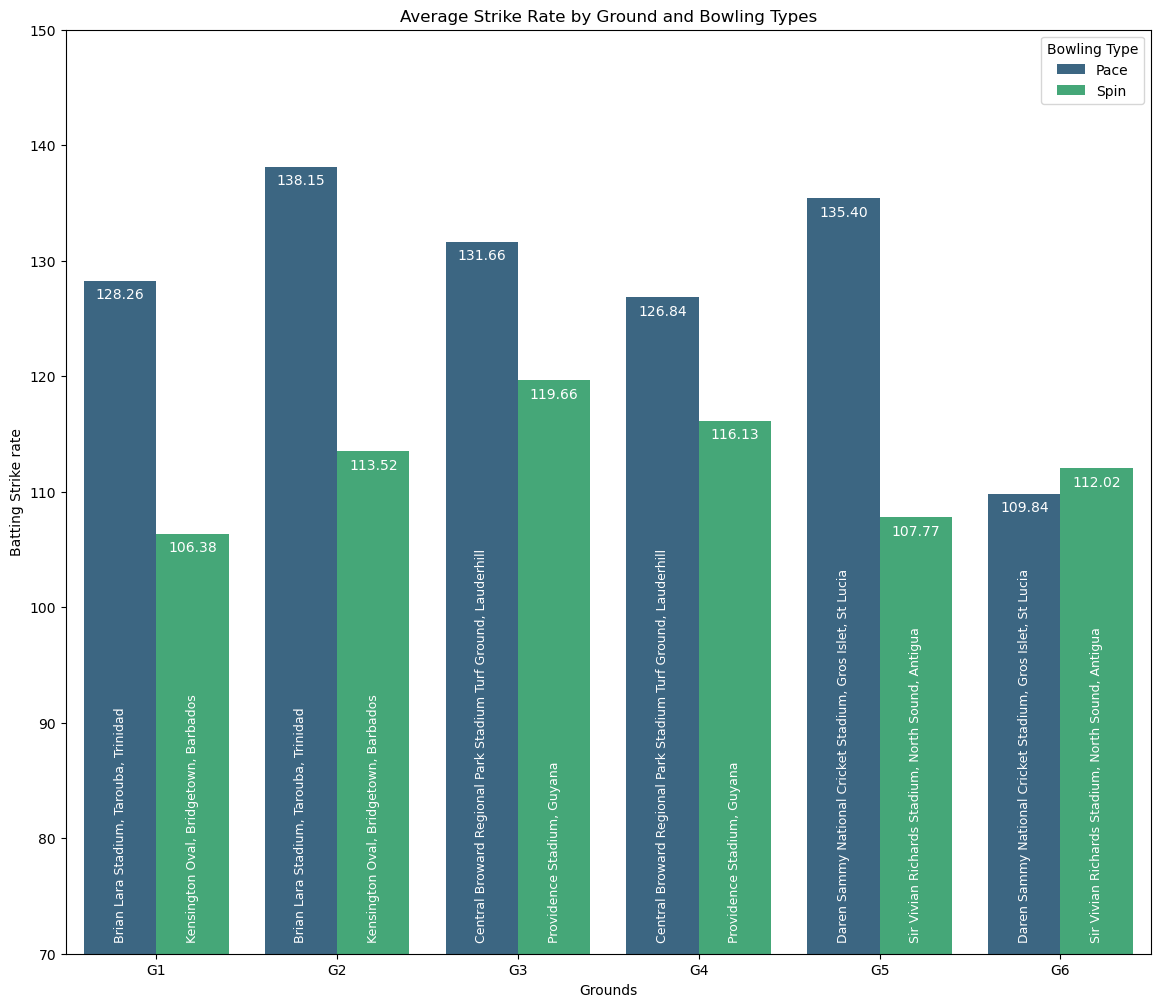

In [22]:
ground_index = {ground: f'G{i}' for i, ground in enumerate(df2_batting['ground'].unique(), 1)}

# Add the index to the dataframe
df2_batting['ground_index'] = df2_batting['ground'].map(ground_index)

plt.figure(figsize=(14, 12))

# Create the bar plot
ax = sns.barplot(x='ground_index', y='strike rate', hue='bowl_kind', data=df2_batting, palette='viridis')

# Annotate bars with ground names outside and scores inside
for p, label in zip(ax.patches, df2_batting['ground']):
    height = p.get_height()
    ax.annotate(format(height, '.2f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', color='white')
    
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., 71), 
                ha = 'center', va = 'bottom', 
                fontsize=9, rotation=90, color='white')

plt.ylim(70,150)
# Title and labels
plt.title('Average Strike Rate by Ground and Bowling Types')
plt.xlabel('Grounds')
plt.ylabel('Batting Strike rate')

# Create the legend for ground names
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Pace', 'Spin'], title='Bowling Type')

plt.show()

In [23]:
df2_batting.to_csv("docs/WC Analysis results/batting_bowlkind_by_ground.csv")

In [24]:
def get_battingstats(df):
    df3=pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner')
    df3_bat=df3.groupby(['Country']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df3_outs=df3[df3['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df3_bat_stats=pd.merge(df3_bat,df3_outs,on='Country')
    df3_bat_stats['bat_avg']=round(df3_bat_stats['batruns']/df3_bat_stats['outs'],2)
    df3_bat_stats['bat_sr']=round(df3_bat_stats['batruns']*100/df3_bat_stats['ballfaced'],2)
    df3_dots=df3[(df3['bowlruns']==0) & (df3['ballfaced']==1)].groupby(['Country']).agg({'ballfaced':'sum'}).reset_index()
    df3_dots.rename(columns={'ballfaced':'dotballs'},inplace=True)
    df3_bat_stats=pd.merge(df3_bat_stats,df3_dots,on="Country")
    df3_bat_stats['dot%']=(df3_bat_stats['dotballs']*100/df3_bat_stats['ballfaced']).round(2)
    def custom_agg(x):
        boundary_runs = x['batruns'].sum()
        return boundary_runs
    # Apply the custom aggregation function and reset index
    df3_bd = df3[((df3['batruns'] == 4) | (df3['batruns'] == 6)) & (df3['ballfaced'] == 1)] \
                .groupby(['Country']).apply(custom_agg).reset_index(name='boundary_runs')
    df3_bat_stats=pd.merge(df3_bat_stats,df3_bd,on="Country")
    df3_bat_stats['boundary%']=(df3_bat_stats['boundary_runs']*100/df3_bat_stats['batruns']).round(2)
    df3_bat_stats.drop(columns=['batruns', 'ballfaced', 'dotballs','boundary_runs','outs'],inplace=True)
    df3_bat_stats.rename(columns={'p_match':'matches_batted'},inplace=True)
    return df3_bat_stats
df3_bat_stats=get_battingstats(df)
df3_bat_stats.head()

Country  matches_batted  bat_avg  bat_sr   dot%  boundary%
0  Afghanistan             688    20.43  133.67  37.96      60.02
1    Australia            1043    29.11  142.94  33.89      60.12
2   Bangladesh             625    22.18  121.91  38.51      56.56
3       Canada              46    29.84  136.81  37.42      60.04
4      England            1247    27.51  144.90  34.67      63.27

In [25]:
pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner')

p_match  inns            bat   p_bat                  team_bat  \
0       1001349     1    Travis Head  530011                 Australia   
1       1001349     1    Travis Head  530011                 Australia   
2       1001349     1    Travis Head  530011                 Australia   
3       1001349     1    Travis Head  530011                 Australia   
4       1001349     1    Travis Head  530011                 Australia   
...         ...   ...            ...     ...                       ...   
326925  1425131     2  Harmeet Singh  422847  United States of America   
326926  1425131     2  Harmeet Singh  422847  United States of America   
326927  1425131     2  Harmeet Singh  422847  United States of America   
326928  1425131     2  Harmeet Singh  422847  United States of America   
326929  1425131     2  Harmeet Singh  422847  United States of America   

                     bowl  p_bowl   team_bowl  ball  ball_id  ... wagonZone  \
0          Lasith Malinga   49758   Sri Lanka     4    13.04  ...         3   
1          Lasith Malinga   49758   Sri Lanka     5    13.05  ...         4   
2          Lasith Malinga   49758   Sri Lanka     7    13.07  ...         5   
3          Lasith Malinga   49758   Sri Lanka     4    16.04  ...         6   
4          Lasith Malinga   49758   Sri Lanka     6    16.06  ...         4   
...                   ...     ...         ...   ...      ...  ...       ...   
326925  Mustafizur Rahman  330902  Bangladesh     5    16.05  ...         5   
326926  Mustafizur Rahman  330902  Bangladesh     6    16.06  ...         5   
326927  Mustafizur Rahman  330902  Bangladesh     4    18.04  ...         0   
326928  Mustafizur Rahman  330902  Bangladesh     5    18.05  ...         6   
326929  Mustafizur Rahman  330902  Bangladesh     6    18.06  ...         3   

                         line                  length         shot  control  \
0            OUTSIDE_OFFSTUMP                    FULL  COVER_DRIVE      1.0   
1            OUTSIDE_OFFSTUMP             GOOD_LENGTH     ON_DRIVE      1.0   
2               ON_THE_STUMPS             GOOD_LENGTH     ON_DRIVE      0.0   
3            OUTSIDE_OFFSTUMP               FULL_TOSS     ON_DRIVE      1.0   
4            OUTSIDE_OFFSTUMP               FULL_TOSS     ON_DRIVE      1.0   
...                       ...                     ...          ...      ...   
326925       OUTSIDE_OFFSTUMP                    FULL     ON_DRIVE      1.0   
326926       OUTSIDE_OFFSTUMP  SHORT_OF_A_GOOD_LENGTH         PULL      1.0   
326927  WIDE_OUTSIDE_OFFSTUMP                    FULL   LEFT_ALONE      NaN   
326928       OUTSIDE_OFFSTUMP               FULL_TOSS        FLICK      1.0   
326929  WIDE_OUTSIDE_OFFSTUMP                    FULL  COVER_DRIVE      1.0   

        predscore  wprob         Player        Country    p_id  
0              -1   -1.0    Travis Head      Australia  530011  
1              -1   -1.0    Travis Head      Australia  530011  
2              -1   -1.0    Travis Head      Australia  530011  
3              -1   -1.0    Travis Head      Australia  530011  
4              -1   -1.0    Travis Head      Australia  530011  
...           ...    ...            ...            ...     ...  
326925         -1   -1.0  Harmeet Singh  United States  422847  
326926         -1   -1.0  Harmeet Singh  United States  422847  
326927         -1   -1.0  Harmeet Singh  United States  422847  
326928         -1   -1.0  Harmeet Singh  United States  422847  
326929         -1   -1.0  Harmeet Singh  United States  422847  

[326930 rows x 60 columns]

In [26]:
def get_bowling_stats(df):
    df4=pd.merge(df[df['bowl'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bowl',right_on='p_id',how='inner')
    df4_bowl=df4.groupby(['Country']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df4_bowl['economy']=(df4_bowl['bowlruns']*6/df4_bowl['ballfaced']).round(2)
    df4_outs=df4[df4['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df4_bowl_stats=pd.merge(df4_bowl,df4_outs,on='Country')
    df4_bowl_stats['bowl_avg']=round(df4_bowl_stats['bowlruns']/df4_bowl_stats['outs'],2)
    df4_bowl_stats['bowl_sr']=round(df4_bowl_stats['ballfaced']/df4_bowl_stats['outs'],2)
    df4_bowl_stats.drop(columns=['bowlruns','ballfaced','outs'],inplace=True)
    df4_bowl_stats.rename(columns={'p_match':'matches_bowled'},inplace=True)
    return df4_bowl_stats
df4_bowl_stats=get_bowling_stats(df)
df4_bowl_stats.head()

Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Afghanistan             984     7.17     21.36    17.86
1    Australia             817     7.96     24.28    18.30
2   Bangladesh             664     7.44     21.08    16.99
3       Canada              45     6.76     18.70    16.59
4      England             956     8.11     23.12    17.10

In [27]:
overall_team_stats1=pd.merge(df3_bat_stats,df4_bowl_stats,on='Country').sort_values('matches_batted',ascending=False).reset_index().drop(columns='index').head(10)
overall_team_stats1.set_index('Country', inplace=True)

overall_team_stats2=pd.merge(df3_bat_stats,df4_bowl_stats,on='Country').sort_values('matches_batted',ascending=False).reset_index().drop(columns='index').tail(10)
overall_team_stats2.set_index('Country', inplace=True)

In [28]:
overall_team_stats1

matches_batted  bat_avg  bat_sr   dot%  boundary%  \
Country                                                           
England                 1247    27.51  144.90  34.67      63.27   
Australia               1043    29.11  142.94  33.89      60.12   
West Indies              974    25.75  140.99  39.39      66.36   
New Zealand              838    28.16  137.33  34.00      58.14   
Pakistan                 800    28.30  132.42  34.65      57.91   
South Africa             797    28.61  136.65  34.11      58.48   
India                    744    31.11  140.32  34.14      61.00   
Afghanistan              688    20.43  133.67  37.96      60.02   
Bangladesh               625    22.18  121.91  38.51      56.56   
Sri Lanka                438    25.68  128.52  36.27      57.05   

              matches_bowled  economy  bowl_avg  bowl_sr  
Country                                                   
England                  956     8.11     23.12    17.10  
Australia                817     7.96     24.28    18.30  
West Indies              683     8.29     23.41    16.94  
New Zealand              794     8.09     23.17    17.18  
Pakistan                 797     7.49     21.73    17.40  
South Africa             622     7.52     21.35    17.04  
India                    745     7.85     24.09    18.42  
Afghanistan              984     7.17     21.36    17.86  
Bangladesh               664     7.44     21.08    16.99  
Sri Lanka                435     7.62     23.07    18.16

In [29]:
overall_team_stats2

matches_batted  bat_avg  bat_sr   dot%  boundary%  \
Country                                                               
Ireland                      390    21.92  133.76  37.96      61.53   
Namibia                      289    23.27  127.27  37.84      56.42   
United States                201    25.11  130.06  38.91      58.80   
Netherlands                  183    21.40  117.33  39.07      52.01   
Scotland                     141    23.73  129.94  37.55      59.00   
Oman                          97    21.33  122.06  39.57      57.88   
Nepal                         89    25.17  134.49  36.88      59.38   
Uganda                        81    22.87  118.51  42.79      58.11   
Papua New Guinea              59    22.55  122.83  39.89      53.89   
Canada                        46    29.84  136.81  37.42      60.04   

                  matches_bowled  economy  bowl_avg  bowl_sr  
Country                                                       
Ireland                      338     7.87     21.52    16.41  
Namibia                      342     7.40     21.49    17.42  
United States                186     7.71     21.90    17.05  
Netherlands                  230     7.97     23.56    17.74  
Scotland                     161     7.76     21.73    16.79  
Oman                         112     7.06     20.52    17.45  
Nepal                         95     7.35     19.40    15.84  
Uganda                        81     5.92     14.14    14.33  
Papua New Guinea              59     6.71     16.85    15.07  
Canada                        45     6.76     18.70    16.59

In [30]:
overall_team_stats1.drop(columns=['matches_batted','matches_bowled'],inplace=True)
overall_team_stats2.drop(columns=['matches_batted','matches_bowled'],inplace=True)

In [31]:
overall_team_stats=pd.concat([overall_team_stats1,overall_team_stats2],ignore_index=False)
overall_team_stats.to_csv("docs/WC Analysis results/overall_team_stats.csv")

In [32]:
cols_increase=['bat_avg','bat_sr','boundary%']
cols_decrease=['dot%','economy','bowl_avg','bowl_sr']
def normalization(cols_increase, cols_decrease, overall_team_stats):
    # Create an empty DataFrame for normalized values
    normalized_df = pd.DataFrame(index=overall_team_stats.index)
    
    # Normalize columns where an increase is favorable
    for col in cols_increase:
        mean = overall_team_stats[col].mean()
        std = overall_team_stats[col].std()
        normalized_df[col] = (overall_team_stats[col] - mean) / std

    # Normalize columns where a decrease is favorable
    for col in cols_decrease:
        mean = overall_team_stats[col].mean()
        std = overall_team_stats[col].std()
        normalized_df[col] = (mean - overall_team_stats[col]) / std
    
    # Rank the teams based on normalized values
    ranked_df = normalized_df.rank(axis=0, method='min', ascending=False).astype(int)
    
    # Calculate the overall rank as the mean of individual ranks
    ranked_df['overallrank'] = ranked_df.mean(axis=1).rank(method='min', ascending=True).astype(int)
    
    # Sort the DataFrame based on the overall rank
    ranked_df = ranked_df.sort_values(by='overallrank')
    
    return normalized_df, ranked_df
normalized_df1,ranked_df1=normalization(cols_increase,cols_decrease,overall_team_stats1)
normalized_df2,ranked_df2=normalization(cols_increase,cols_decrease,overall_team_stats2)
normalized_df1.head()

bat_avg    bat_sr  boundary%      dot%   economy  bowl_avg  \
Country                                                                    
England      0.252995  1.269483   1.114611  0.515264 -0.991340 -0.383113   
Australia    0.743057  0.991006   0.075539  0.884324 -0.573640 -1.361992   
West Indies -0.286074  0.713951   2.133891 -1.718021 -1.492579 -0.627833   
New Zealand  0.452082  0.193939  -0.577592  0.832278 -0.935646 -0.425306   
Pakistan     0.494963 -0.503673  -0.653461  0.524728  0.735151  0.789854   

              bowl_sr  
Country                
England      0.748720  
Australia   -1.297895  
West Indies  1.021602  
New Zealand  0.612279  
Pakistan     0.237066

In [33]:
ranked_df1.head()

bat_avg  bat_sr  boundary%  dot%  economy  bowl_avg  bowl_sr  \
Country                                                                      
South Africa        3       6          6     3        4         2        3   
England             6       1          2     6        9         6        4   
Australia           2       2          4     1        7        10        9   
India               1       4          3     4        6         9       10   
Pakistan            4       8          8     5        3         4        6   

              overallrank  
Country                    
South Africa            1  
England                 2  
Australia               3  
India                   4  
Pakistan                5

In [34]:
ranked_df2.head()

bat_avg  bat_sr  boundary%  dot%  economy  bowl_avg  bowl_sr  \
Country                                                                  
Canada          1       1          2     2        3         3        5   
Nepal           2       2          3     1        5         4        3   
Uganda          6       9          6    10        1         1        1   
Ireland         8       3          1     5        9         7        4   
Scotland        4       5          4     3        8         8        6   

          overallrank  
Country                
Canada              1  
Nepal               2  
Uganda              3  
Ireland             4  
Scotland            5

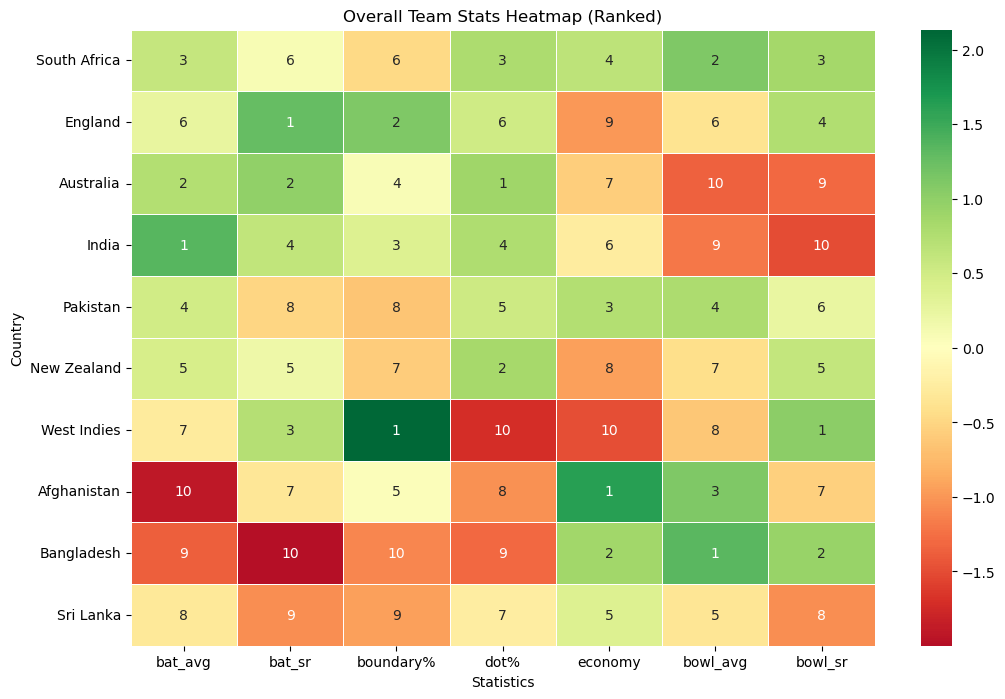

In [35]:
normalized_df1=normalized_df1.reindex(ranked_df1.index)
normalized_df2=normalized_df2.reindex(ranked_df2.index)
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df1, annot=ranked_df1.drop(columns='overallrank'), fmt='d', cmap='RdYlGn', linewidths=.5, center=0)

# Title and labels
plt.title('Overall Team Stats Heatmap (Ranked)')
plt.xlabel('Statistics')
plt.ylabel('Country')

# Show the plot
plt.show()

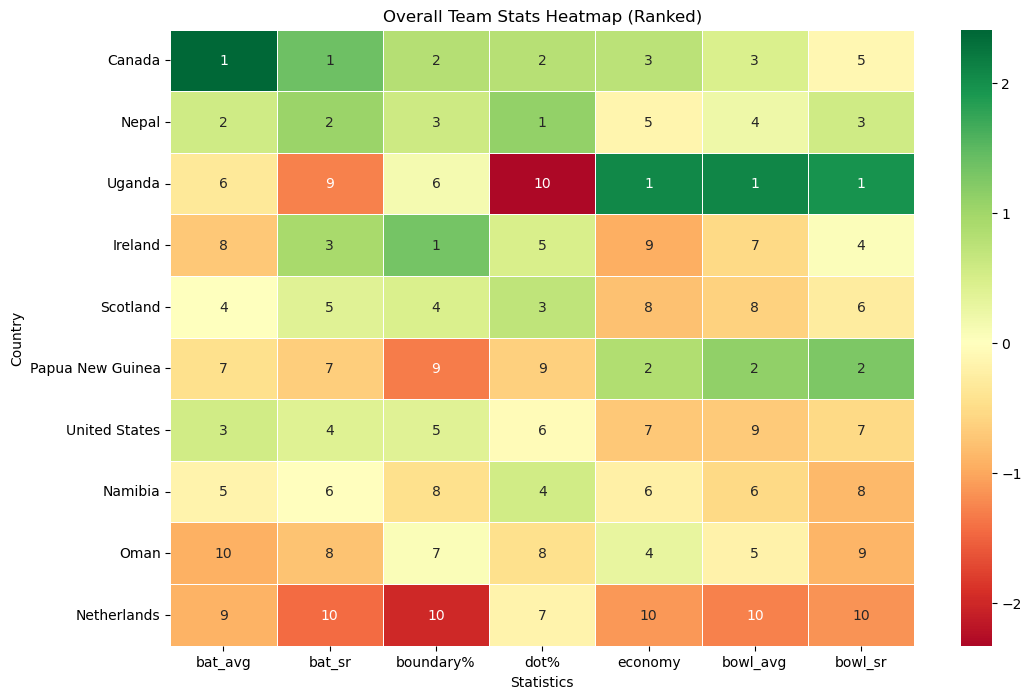

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df2, annot=ranked_df2.drop(columns='overallrank'), fmt='d', cmap='RdYlGn', linewidths=.5, center=0)

# Title and labels
plt.title('Overall Team Stats Heatmap (Ranked)')
plt.xlabel('Statistics')
plt.ylabel('Country')

# Show the plot
plt.show()

In [37]:
normalized_df1.to_csv("docs/WC Analysis results/normalised_overallstats_top10.csv")
normalized_df2.to_csv("docs/WC Analysis results/normalised_overallstats_bottom10.csv")

In [38]:
df_bat_pp=get_battingstats((df[df['over']<=5]))
df_bat_mid=get_battingstats(df[(df['over']>=6)&(df['over']<=14)])
df_bat_death=get_battingstats(df[(df['over']>=15)])
df_bowl_pp=get_bowling_stats(df[df['over']<=5])
df_bowl_mid=get_bowling_stats(df[(df['over']>=6)&(df['over']<=14)])
df_bowl_death=get_bowling_stats(df[(df['over']>=15)])

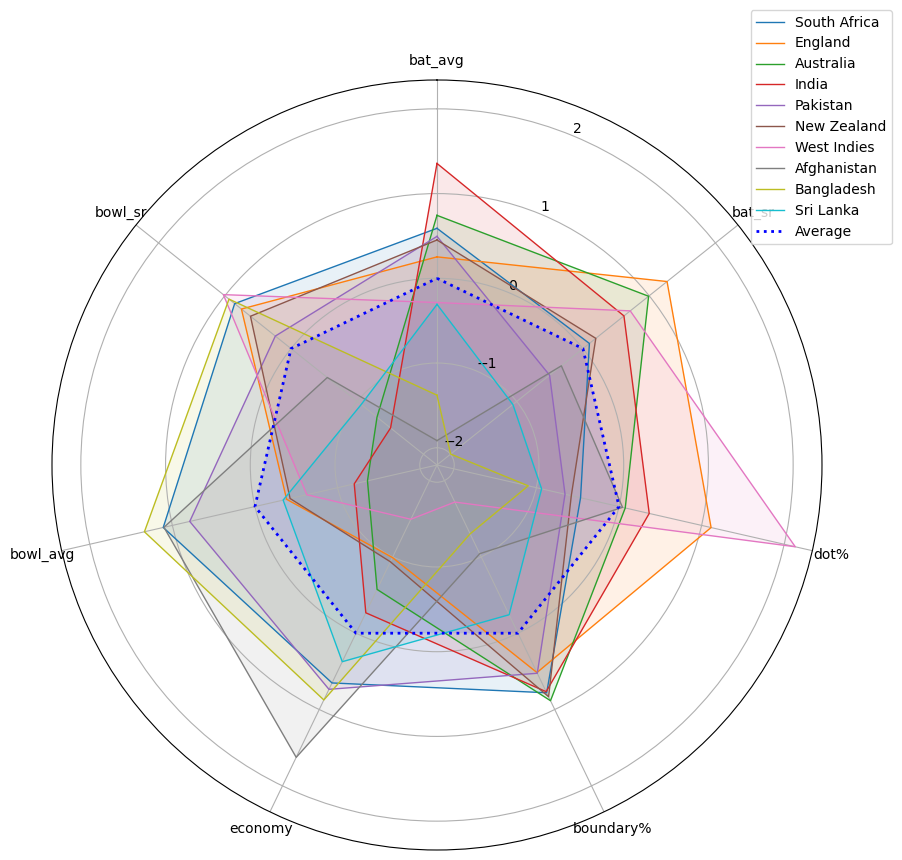

In [39]:
#df=overall_team_stats
# Normalize the data

# Calculate the average values for normalized data
averages = normalized_df1.mean()

# Plot
attributes = overall_team_stats1.columns
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], attributes)

# Plot each individual country
for country in normalized_df1.index:
    values = normalized_df1.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

# Plot the average values
average_values = averages.tolist()
average_values += average_values[:1]
ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

# Fill area for the average values
ax.fill(angles, average_values, 'b', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [40]:
def spider_plot_stats(normalized_df,country):

    # Calculate the average values for normalized data
    averages = normalized_df.mean()

    # Plot
    attributes = normalized_df.columns
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], attributes)

    # Plot each individual country
    #for country in normalized_df.index:
    values = normalized_df.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

    # Plot the average values
    average_values = averages.tolist()
    average_values += average_values[:1]
    ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

    # Fill area for the average values
    ax.fill(angles, average_values, 'b', alpha=0.1)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.show()


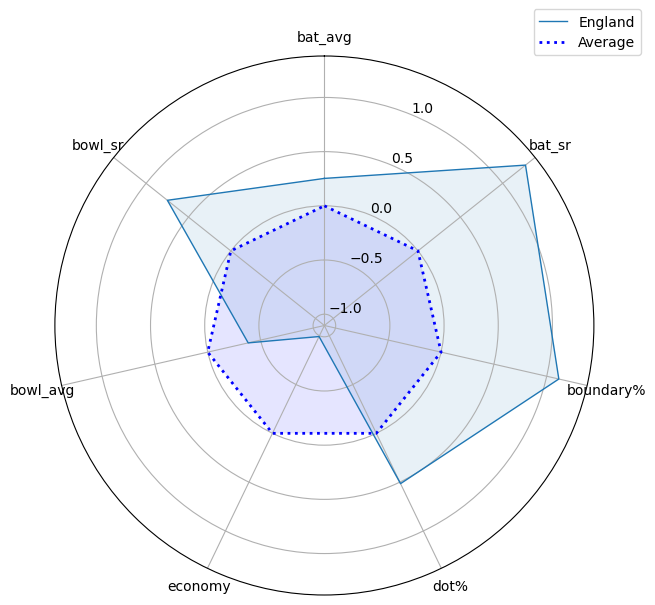

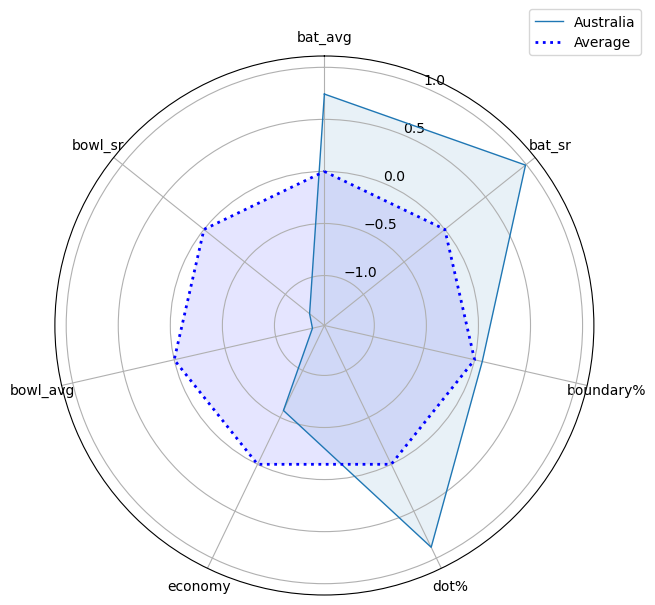

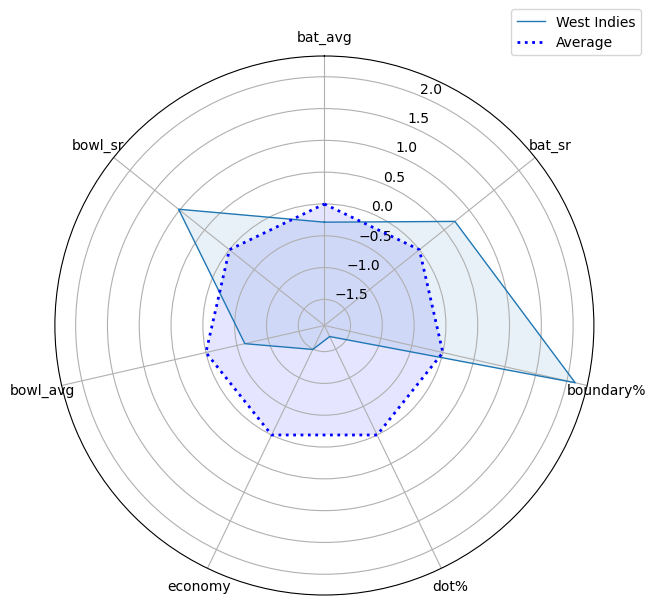

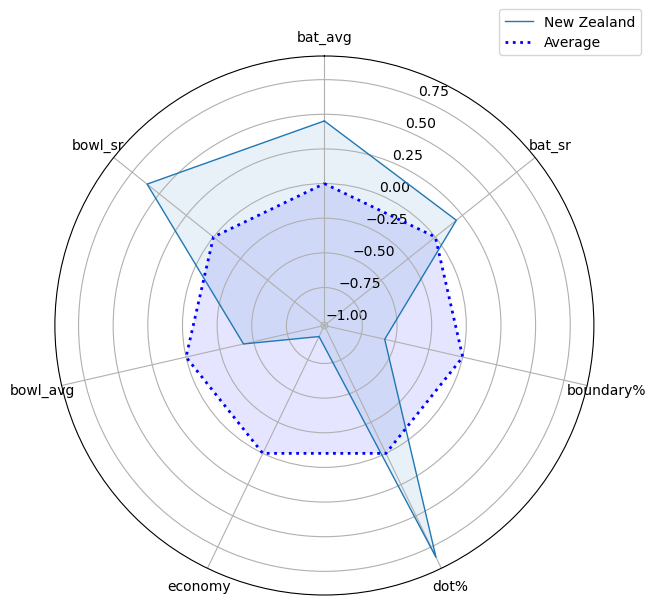

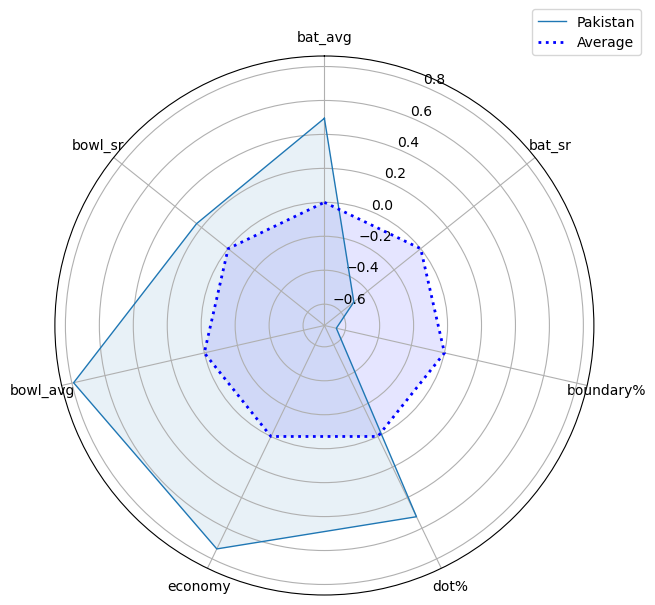

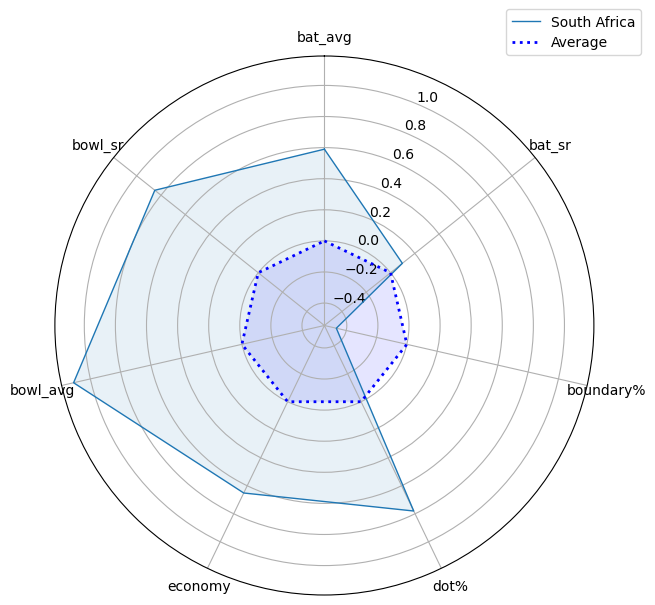

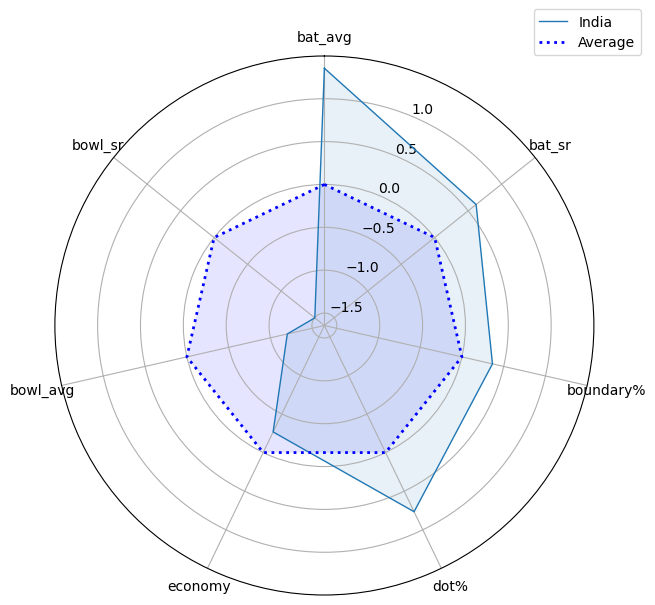

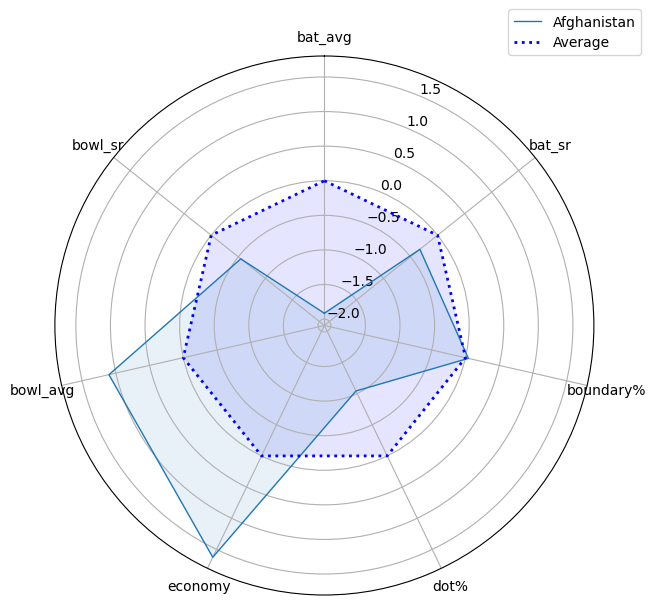

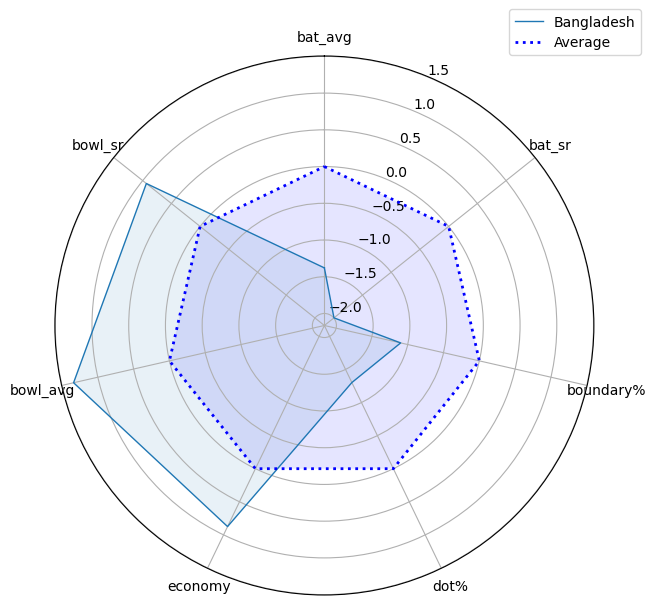

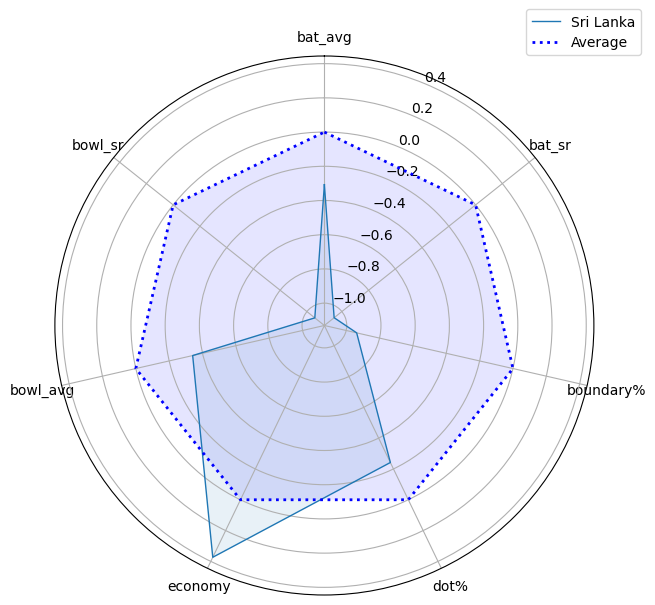

In [41]:
normalized_df,_=normalization(['bat_avg','bat_sr','boundary%'],['dot%','economy','bowl_avg','bowl_sr'],overall_team_stats1)
for country in normalized_df.index:
    spider_plot_stats(normalized_df,country)

In [42]:
df_bat_pp['Phase'] = 'pp'
df_bat_mid['Phase'] = 'mid'
df_bat_death['Phase'] = 'death'
df_bowl_pp['Phase'] = 'pp'
df_bowl_mid['Phase'] = 'mid'
df_bowl_death['Phase'] = 'death'

In [43]:
# Function to normalize and calculate the 'bowl' column
def normalize_and_calculate_bowl(df):
    df_norm, _ = normalization([], ['economy', 'bowl_avg'], df[['economy', 'bowl_avg']])
    for col in df_norm.columns:
        df.loc[:, col] = df_norm[col]
    df['bowl'] = round(0.5 * df['economy'] + 0.5 * df['bowl_avg'], 2)
    df.drop(columns=['economy', 'bowl_avg'], inplace=True)
    return df

# Function to normalize and calculate the 'bat' column
def normalize_and_calculate_bat(df):
    df_norm, _ = normalization(['bat_avg', 'bat_sr'], [], df[['bat_avg', 'bat_sr']])
    for col in df_norm.columns:
        df.loc[:, col] = df_norm[col]
    df['bat'] = round(0.5 * df['bat_avg'] + 0.5 * df['bat_sr'], 2)
    df.drop(columns=['bat_avg', 'bat_sr'], inplace=True)
    return df

# Function to separate, normalize, and calculate phases for given dataframes
def process_phases(df, team_stats1, team_stats2, normalize_func):
    df1 = df[df['Country'].isin(team_stats1.index)].copy()
    df2 = df[df['Country'].isin(team_stats2.index)].copy()

    df1 = normalize_func(df1)
    df2 = normalize_func(df2)
    
    return df1, df2

# Concatenate the bowling data and drop unnecessary columns
df_phases_bowl = pd.concat([df_bowl_pp, df_bowl_mid, df_bowl_death], ignore_index=True)
df_phases_bowl.drop(columns=['matches_bowled', 'bowl_sr'], inplace=True)

# Process bowling phases
df_phases_bowl1, df_phases_bowl2 = process_phases(df_phases_bowl, overall_team_stats1, overall_team_stats2, normalize_and_calculate_bowl)

# Concatenate the batting data and drop unnecessary columns
df_phases_bat = pd.concat([df_bat_pp, df_bat_mid, df_bat_death], ignore_index=True)
df_phases_bat.drop(columns=['matches_batted', 'dot%', 'boundary%'], inplace=True)

# Process batting phases
df_phases_bat1, df_phases_bat2 = process_phases(df_phases_bat, overall_team_stats1, overall_team_stats2, normalize_and_calculate_bat)

# Display the first few rows of the processed dataframes
print(df_phases_bowl2.head())
print(df_phases_bat1.head())

       Country Phase  bowl
3       Canada    pp  1.02
6      Ireland    pp -0.17
7      Namibia    pp -0.31
8        Nepal    pp -0.43
9  Netherlands    pp -0.71
       Country Phase   bat
0  Afghanistan    pp -0.50
1    Australia    pp  0.63
2   Bangladesh    pp -0.96
4      England    pp  0.63
5        India    pp  0.35


In [44]:
# Initialize final DataFrames
df_phases1 = pd.DataFrame(columns=['Country', 'batting_pp', 'bowling_pp', 'batting_mid', 'bowling_mid', 'batting_death', 'bowling_death'])
df_phases2 = pd.DataFrame(columns=['Country', 'batting_pp', 'bowling_pp', 'batting_mid', 'bowling_mid', 'batting_death', 'bowling_death'])

# Assign unique countries
df_phases1['Country'] = df_phases_bowl1['Country'].unique()
df_phases2['Country'] = df_phases_bowl2['Country'].unique()

# Function to map phase data
def map_phase_data(df_phases, df_bat, df_bowl, phase):
    bat_phase = df_bat[df_bat['Phase'] == phase].set_index('Country')['bat']
    bowl_phase = df_bowl[df_bowl['Phase'] == phase].set_index('Country')['bowl']
    df_phases[f'batting_{phase}'] = df_phases['Country'].map(bat_phase)
    df_phases[f'bowling_{phase}'] = df_phases['Country'].map(bowl_phase)

# Map phases for both DataFrames
for phase in ['pp', 'mid', 'death']:
    map_phase_data(df_phases1, df_phases_bat1, df_phases_bowl1, phase)
    map_phase_data(df_phases2, df_phases_bat2, df_phases_bowl2, phase)

# Calculate overall score
df_phases1['overall'] = round(df_phases1.drop(columns=['Country']).mean(axis=1), 2)
df_phases2['overall'] = round(df_phases2.drop(columns=['Country']).mean(axis=1), 2)

# Reorder columns
desired_order = ['Country', 'overall', 'batting_pp', 'batting_mid', 'batting_death', 'bowling_pp', 'bowling_mid', 'bowling_death']
df_phases1 = df_phases1[desired_order]
df_phases2 = df_phases2[desired_order]

# Set 'Country' as the index and reorder according to ranked_df
df_phases1.set_index('Country', inplace=True)
df_phases1 = df_phases1.reindex(ranked_df1.index)

df_phases2.set_index('Country', inplace=True)

# Display the first few rows of df_phases2
df_phases2.head()

overall  batting_pp  batting_mid  batting_death  bowling_pp  \
Country                                                                    
Canada          0.72        1.17         0.64           1.26        1.02   
Ireland        -0.25        0.15         0.00          -0.24       -0.17   
Namibia        -0.21       -0.25        -0.58           0.42       -0.31   
Nepal           0.14       -0.21         0.36           0.81       -0.43   
Netherlands    -0.60       -0.24        -0.55          -0.58       -0.71   

             bowling_mid  bowling_death  
Country                                  
Canada             -0.49           0.73  
Ireland            -0.91          -0.31  
Namibia            -0.23          -0.28  
Nepal               0.47          -0.17  
Netherlands        -0.84          -0.68

In [45]:
df_phases1_long=df_phases1.reset_index()
df_phases1_long=pd.melt(df_phases1_long, id_vars=['Country'], var_name='Metric', value_name='Value')
df_phases1_long.to_csv("docs/WC Analysis results/phases1_long.csv")

df_phases2_long=df_phases2.reset_index()
df_phases2_long=pd.melt(df_phases2_long, id_vars=['Country'], var_name='Metric', value_name='Value')
df_phases2_long.to_csv("docs/WC Analysis results/phases2_long.csv")

In [46]:

df_phases2.to_csv("docs/WC Analysis results/phases_bottom10.csv")
df_phases1.to_csv("docs/WC Analysis results/phases_top10.csv")

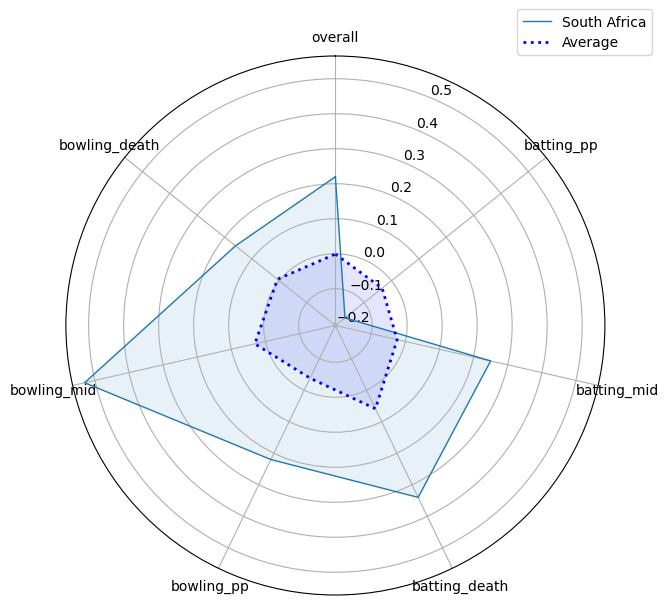

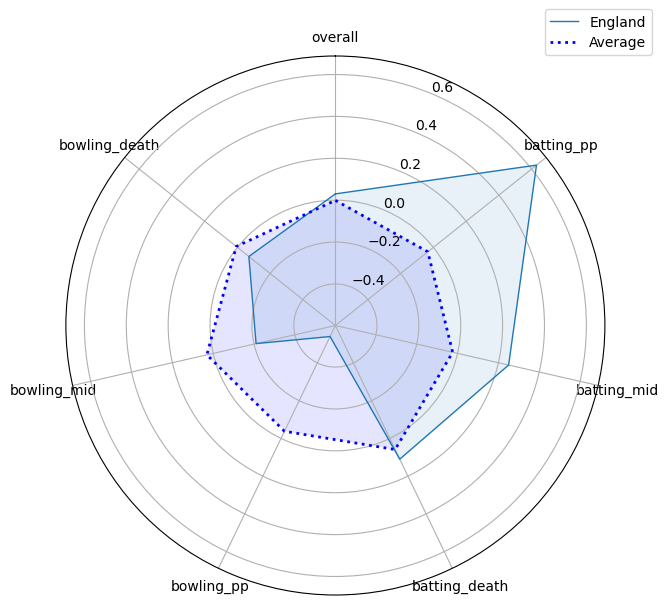

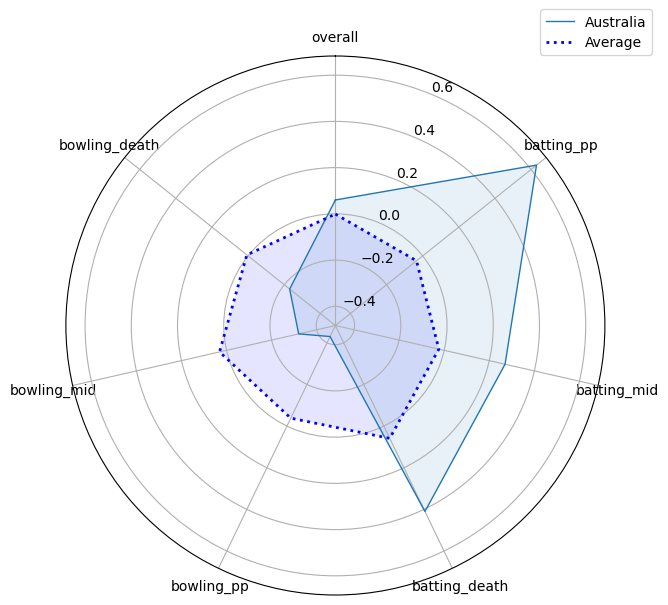

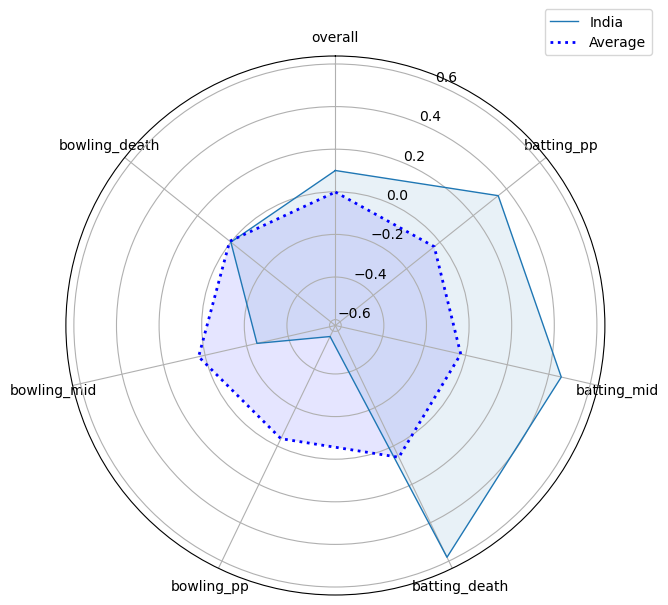

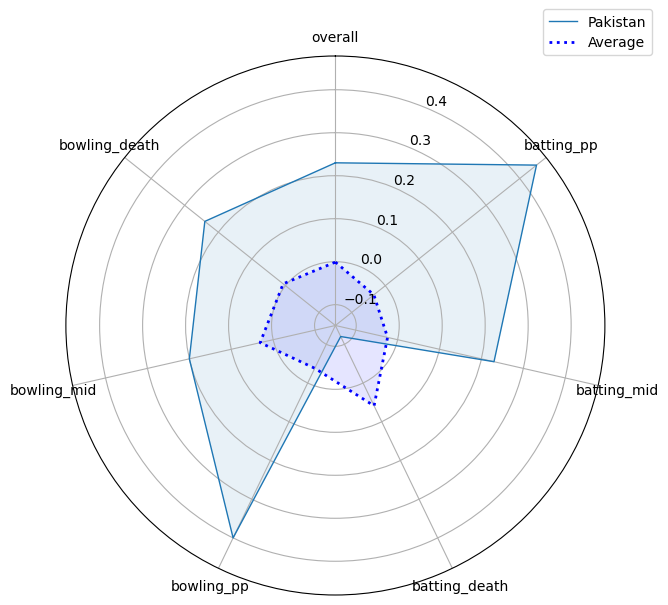

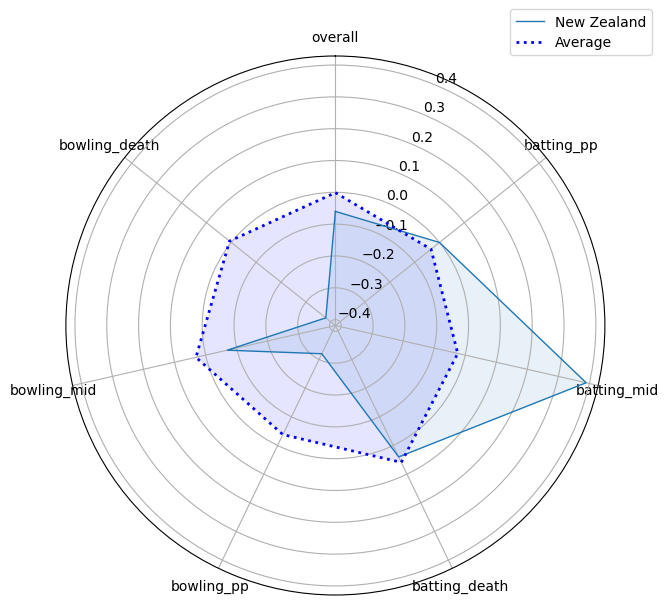

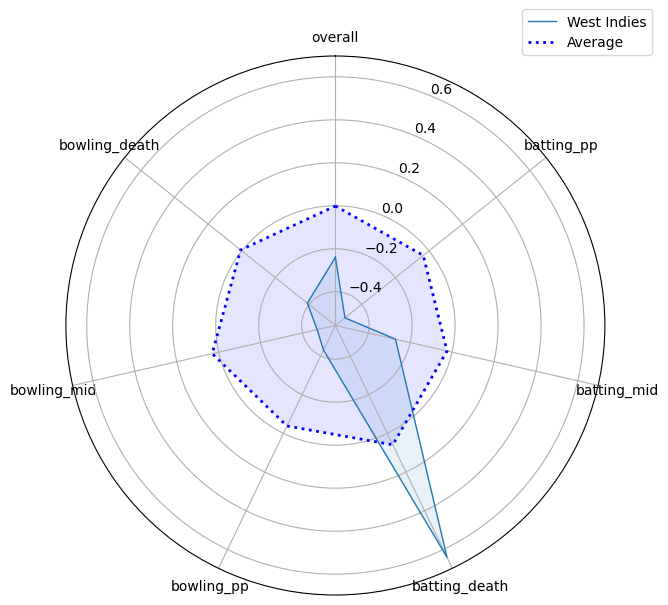

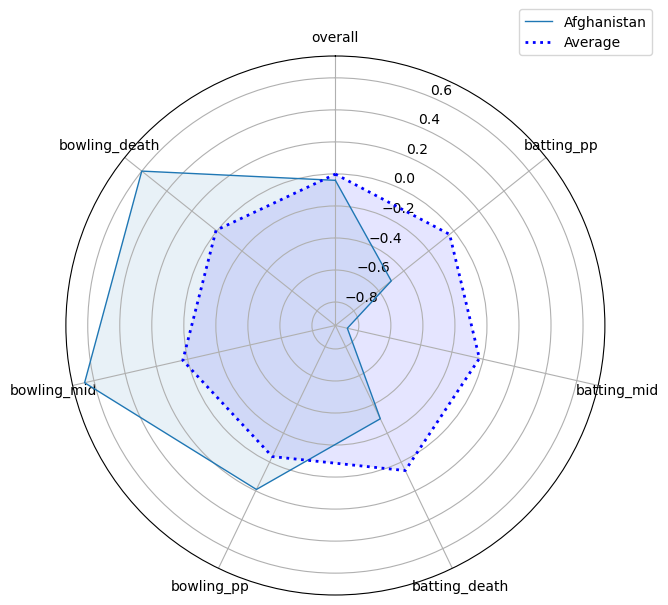

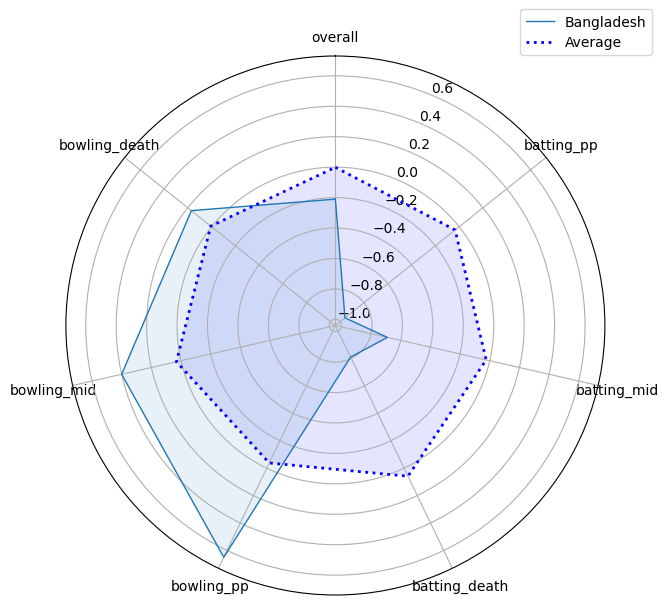

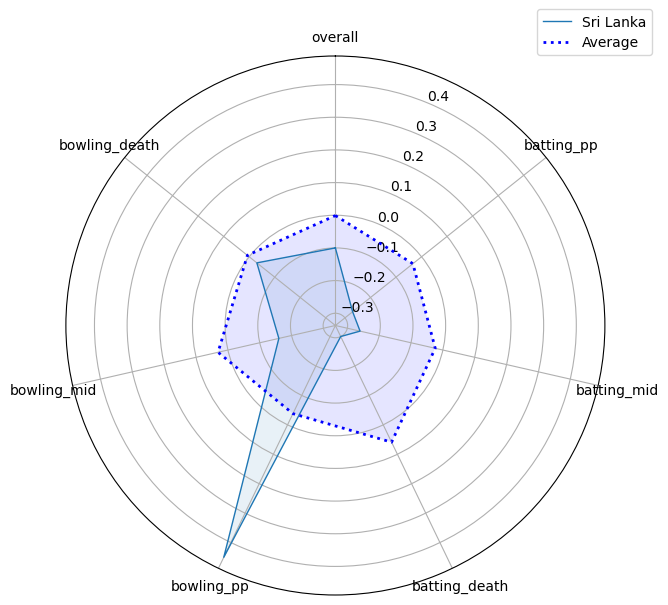

In [47]:
for country in df_phases1.index:
    spider_plot_stats(df_phases1,country)

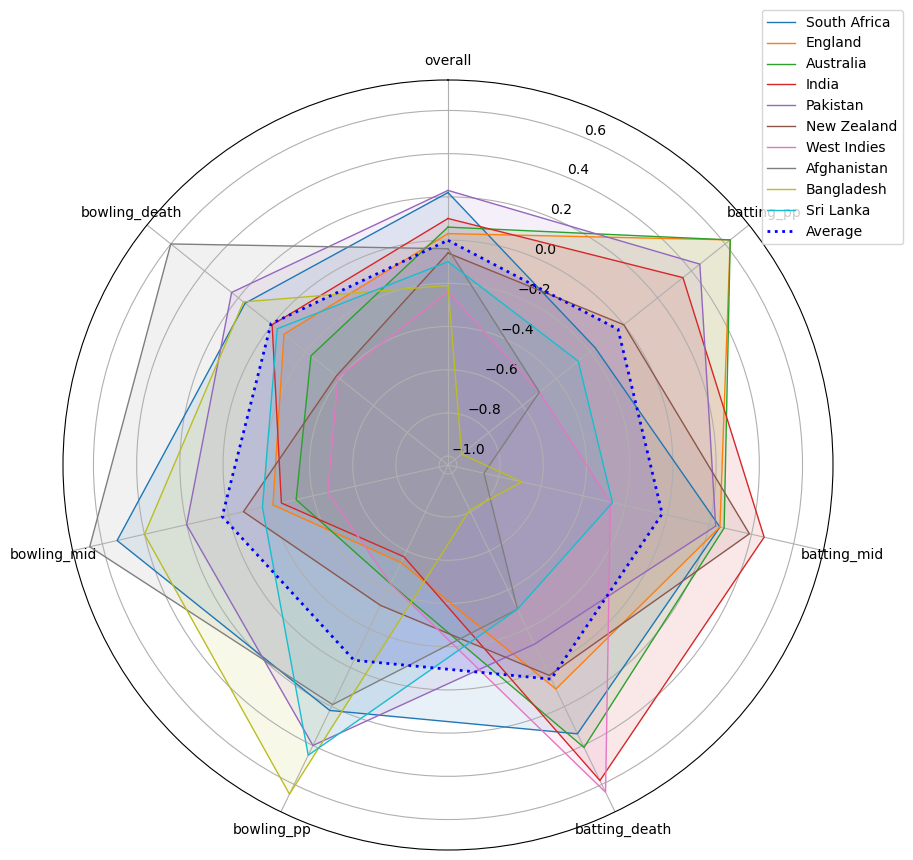

In [48]:
averages = df_phases1.mean()

# Plot
attributes = df_phases1.columns
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], attributes)

# Plot each individual country
for country in df_phases1.index:
    values = df_phases1.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

# Plot the average values
average_values = averages.tolist()
average_values += average_values[:1]
ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

# Fill area for the average values
ax.fill(angles, average_values, 'b', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [49]:
df_phases2

overall  batting_pp  batting_mid  batting_death  bowling_pp  \
Country                                                                         
Canada               0.72        1.17         0.64           1.26        1.02   
Ireland             -0.25        0.15         0.00          -0.24       -0.17   
Namibia             -0.21       -0.25        -0.58           0.42       -0.31   
Nepal                0.14       -0.21         0.36           0.81       -0.43   
Netherlands         -0.60       -0.24        -0.55          -0.58       -0.71   
Oman                -0.16       -0.18        -0.26          -0.68        0.28   
Papua New Guinea     0.17       -0.67        -0.07          -0.19        0.99   
Scotland            -0.19        0.45         0.07          -0.30       -0.30   
Uganda               0.46       -0.46        -0.35          -0.22        1.33   
United States       -0.09        0.29         0.13           0.28       -0.10   

                  bowling_mid  bowling_death  
Country                                       
Canada                  -0.49           0.73  
Ireland                 -0.91          -0.31  
Namibia                 -0.23          -0.28  
Nepal                    0.47          -0.17  
Netherlands             -0.84          -0.68  
Oman                     0.06          -0.18  
Papua New Guinea         0.51           0.44  
Scotland                -0.61          -0.43  
Uganda                   1.17           1.29  
United States           -0.27          -0.86

In [52]:
df3=pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner').drop(columns=['p_id','Player'])

main_bowling_styles=['RFM', 'RF', 'LF', 'LFM' , 'RWS' , 'LWS', 'RM', 'LM', 'SLA', 'OB',  'RSM','LSM']
df3=df3[df3['bowl_style'].isin(main_bowling_styles)]

df3['bowl_style']=df3['bowl_style'].replace(['RFM', 'RF','RM','RSM'],"Right Arm Pace")
df3['bowl_style']=df3['bowl_style'].replace(['LFM', 'LF','LM','LSM'],"Left Arm Pace")
df3['bowl_style']=df3['bowl_style'].replace(['RWS' , 'LWS'],"Wrist Spin")
df3['bowl_style']=df3['bowl_style'].replace(['SLA'],"Left OffSpin")
df3['bowl_style']=df3['bowl_style'].replace(['OB'],"Right OffSpin")

df3_bowlkind=df3.groupby(['Country','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)

df3_outs=df3[df3['out']==True].groupby(['Country','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
df3_outs.rename(columns={'count':'dismissals'},inplace=True)

df3_bowlkind=pd.merge(df3_bowlkind,df3_outs,on=['Country','bowl_style'])
df3_bowlkind=df3_bowlkind[df3_bowlkind['Country'].isin(ranked_df1.index)]

df3_bowlkind['bat_avg']=round(df3_bowlkind['batruns']/df3_bowlkind['dismissals'],2)
df3_bowlkind['bat_sr']=round(df3_bowlkind['batruns']*100/df3_bowlkind['ballfaced'],2)
df3_bowlkind.drop(columns=['p_match','batruns','ballfaced','dismissals'],inplace=True)
df3_bowlkind

Country      bowl_style  bat_avg  bat_sr
0        England  Right Arm Pace    28.33  150.61
1          India  Right Arm Pace    29.33  146.33
2      Australia  Right Arm Pace    30.15  148.70
3       Pakistan  Right Arm Pace    26.95  138.63
4    West Indies  Right Arm Pace    25.41  152.13
5   South Africa  Right Arm Pace    27.21  141.17
6    New Zealand  Right Arm Pace    27.20  141.32
7     Bangladesh  Right Arm Pace    21.67  129.51
9    Afghanistan  Right Arm Pace    19.52  143.20
10     Sri Lanka  Right Arm Pace    24.96  135.99
11     Australia      Wrist Spin    28.99  139.24
12       England      Wrist Spin    24.09  141.24
13      Pakistan   Left Arm Pace    28.64  131.31
14         India      Wrist Spin    34.71  131.58
15       England   Left Arm Pace    27.12  145.10
16   West Indies   Left Arm Pace    27.56  150.90
17         India   Left Arm Pace    26.71  146.24
18   West Indies      Wrist Spin    22.86  126.02
19      Pakistan      Wrist Spin    26.81  129.68
20     Australia   Left Arm Pace    24.50  145.42
21       England    Left OffSpin    26.70  135.22
22    Bangladesh   Right OffSpin    24.22  116.56
24   New Zealand   Left Arm Pace    23.28  139.65
25      Pakistan    Left OffSpin    33.45  121.38
26   New Zealand      Wrist Spin    29.97  131.91
27   West Indies    Left OffSpin    27.54  127.89
28  South Africa      Wrist Spin    29.13  138.12
29  South Africa   Left Arm Pace    27.91  135.17
30   New Zealand    Left OffSpin    30.97  134.69
31   West Indies   Right OffSpin    27.38  119.78
32    Bangladesh    Left OffSpin    24.52  113.32
33     Australia   Right OffSpin    36.06  131.03
35         India   Right OffSpin    44.13  129.48
37         India    Left OffSpin    35.43  125.60
38   New Zealand   Right OffSpin    37.22  127.20
39     Australia    Left OffSpin    26.32  132.12
40       England   Right OffSpin    31.56  132.28
43  South Africa    Left OffSpin    29.02  130.01
44    Bangladesh   Left Arm Pace    19.85  120.85
46  South Africa   Right OffSpin    36.41  122.96
47     Sri Lanka      Wrist Spin    21.10  120.63
49      Pakistan   Right OffSpin    31.27  119.98
51     Sri Lanka   Right OffSpin    27.62  127.63
52     Sri Lanka    Left OffSpin    31.89  117.15
53     Sri Lanka   Left Arm Pace    25.49  127.64
55   Afghanistan      Wrist Spin    20.17  119.33
57   Afghanistan   Left Arm Pace    17.69  137.71
60   Afghanistan    Left OffSpin    26.73  118.79
62    Bangladesh      Wrist Spin    19.86  111.64
64   Afghanistan   Right OffSpin    25.30  121.68

In [87]:
df3_batting_vs_bowltype=pd.DataFrame()
df3_batting_vs_bowltype['Country']=df3_bowlkind['Country'].unique()

def map_bat_data(df_bat_main, df_bat, style):
    stats=df_bat[df_bat['bowl_style']==style].set_index('Country')[['bat_avg','bat_sr']]
    df_bat_main[f'{style}_avg']=df_bat_main['Country'].map(stats['bat_avg'])
    df_bat_main[f'{style}_sr']=df_bat_main['Country'].map(stats['bat_sr'])
    
# Map phases for both DataFrames
styles=["Right Arm Pace", "Left Arm Pace", "Wrist Spin","Right OffSpin","Left OffSpin"]
for style in styles:
    map_bat_data(df3_batting_vs_bowltype, df3_bowlkind, style)
df3_batting_vs_bowltype.set_index('Country',inplace=True)
df3_batting_vs_bowltype,_=normalization(df3_batting_vs_bowltype.columns,[],df3_batting_vs_bowltype)
df3_batting_vs_bowltype

Right Arm Pace_avg  Right Arm Pace_sr  Left Arm Pace_avg  \
Country                                                                  
England                 0.678245           1.121959           0.617550   
India                   0.978753           0.510319           0.504768   
Australia               1.225169           0.849007          -0.103154   
Pakistan                0.263545          -0.590061           1.035669   
West Indies            -0.199236           1.339177           0.738585   
South Africa            0.341677          -0.227078           0.834862   
New Zealand             0.338672          -0.205642          -0.438750   
Bangladesh             -1.323134          -1.893368          -1.382268   
Afghanistan            -1.969225           0.063022          -1.976437   
Sri Lanka              -0.334465          -0.967334           0.169173   

              Left Arm Pace_sr  Wrist Spin_avg  Wrist Spin_sr  \
Country                                                         
England               0.754687       -0.339833       1.283076   
India                 0.875845        1.809679       0.275474   
Australia             0.788696        0.651938       1.074463   
Pakistan             -0.710900        0.210701       0.077291   
West Indies           1.371105       -0.588788      -0.304471   
South Africa         -0.300663        0.680274       0.957639   
New Zealand           0.175467        0.850292       0.309895   
Bangladesh           -1.822578       -1.195995      -1.804401   
Afghanistan          -0.030715       -1.133250      -1.002283   
Sri Lanka            -1.100944       -0.945016      -0.866684   

              Right OffSpin_avg  Right OffSpin_sr  Left OffSpin_avg  \
Country                                                               
England               -0.088457          1.381274         -0.723076   
India                  1.907777          0.860179          1.745619   
Australia              0.626185          1.148642         -0.830533   
Pakistan              -0.134512         -0.907822          1.185709   
West Indies           -0.752280         -0.945043         -0.485538   
South Africa           0.681769         -0.353228         -0.067020   
New Zealand            0.810404          0.435859          0.484407   
Bangladesh            -1.254117         -1.544302         -1.339543   
Afghanistan           -1.082603         -0.591443         -0.714592   
Sri Lanka             -0.714166          0.515884          0.744567   

              Left OffSpin_sr  
Country                        
England              1.252852  
India               -0.002218  
Australia            0.848412  
Pakistan            -0.552779  
West Indies          0.296546  
South Africa         0.573131  
New Zealand          1.183706  
Bangladesh          -1.604324  
Afghanistan         -0.890682  
Sri Lanka           -1.104644

In [88]:
for style in styles:
    df3_batting_vs_bowltype[f'{style}_bat']=round((df3_batting_vs_bowltype[f'{style}_avg']*0.5+df3_batting_vs_bowltype[f'{style}_sr']*0.5),2)
    df3_batting_vs_bowltype.drop(columns=[f'{style}_avg',f'{style}_sr'],inplace=True)
df3_batting_vs_bowltype

Right Arm Pace_bat  Left Arm Pace_bat  Wrist Spin_bat  \
Country                                                               
England                     0.90               0.69            0.47   
India                       0.74               0.69            1.04   
Australia                   1.04               0.34            0.86   
Pakistan                   -0.16               0.16            0.14   
West Indies                 0.57               1.05           -0.45   
South Africa                0.06               0.27            0.82   
New Zealand                 0.07              -0.13            0.58   
Bangladesh                 -1.61              -1.60           -1.50   
Afghanistan                -0.95              -1.00           -1.07   
Sri Lanka                  -0.65              -0.47           -0.91   

              Right OffSpin_bat  Left OffSpin_bat  
Country                                            
England                    0.65              0.26  
India                      1.38              0.87  
Australia                  0.89              0.01  
Pakistan                  -0.52              0.32  
West Indies               -0.85             -0.09  
South Africa               0.16              0.25  
New Zealand                0.62              0.83  
Bangladesh                -1.40             -1.47  
Afghanistan               -0.84             -0.80  
Sri Lanka                 -0.10             -0.18

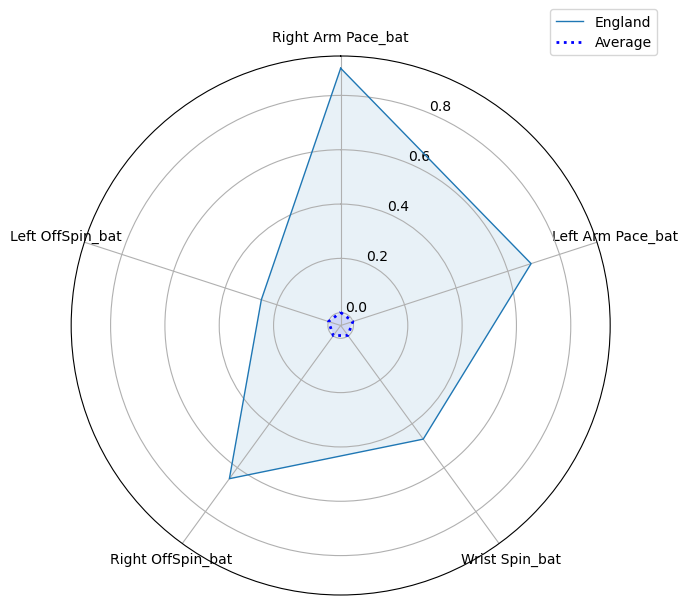

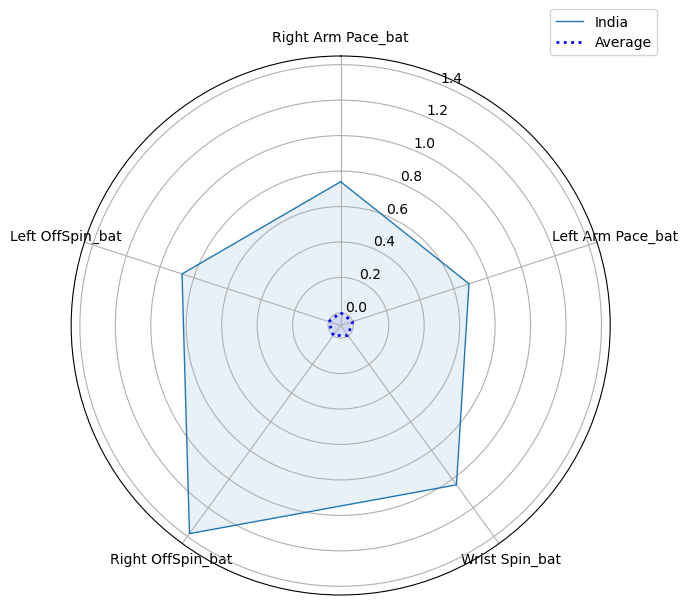

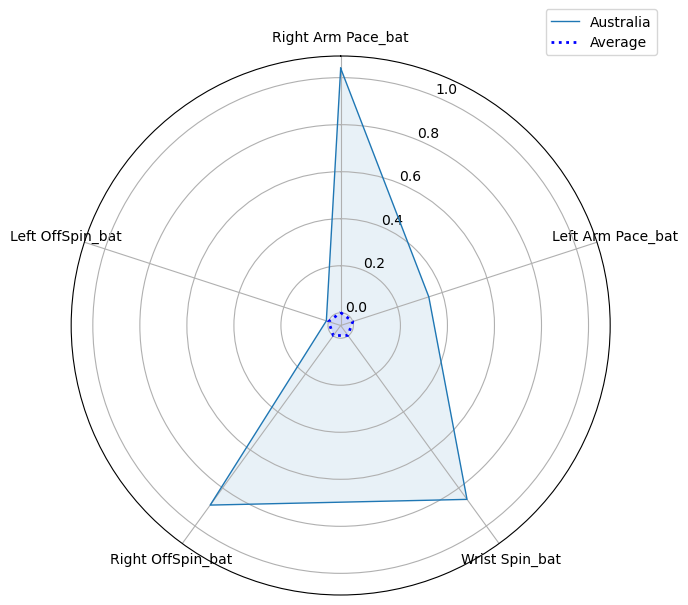

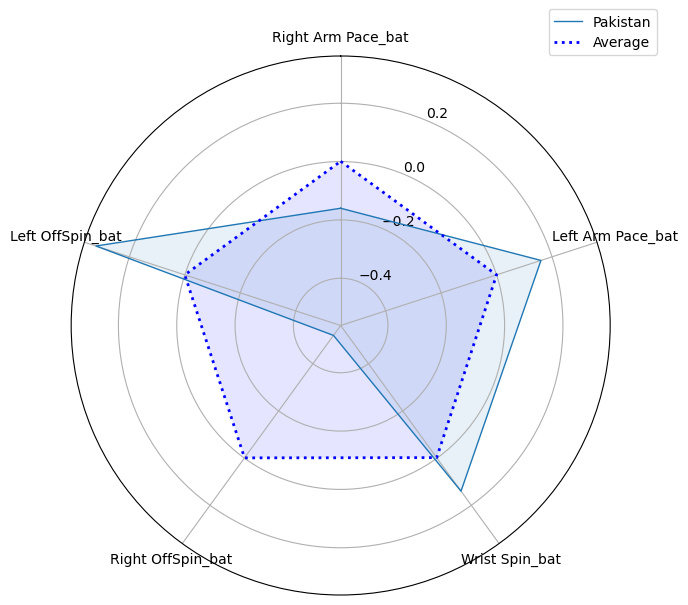

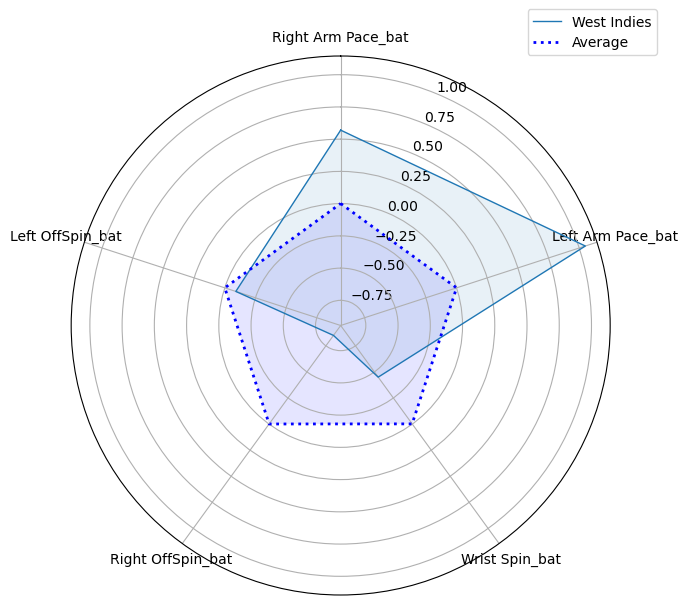

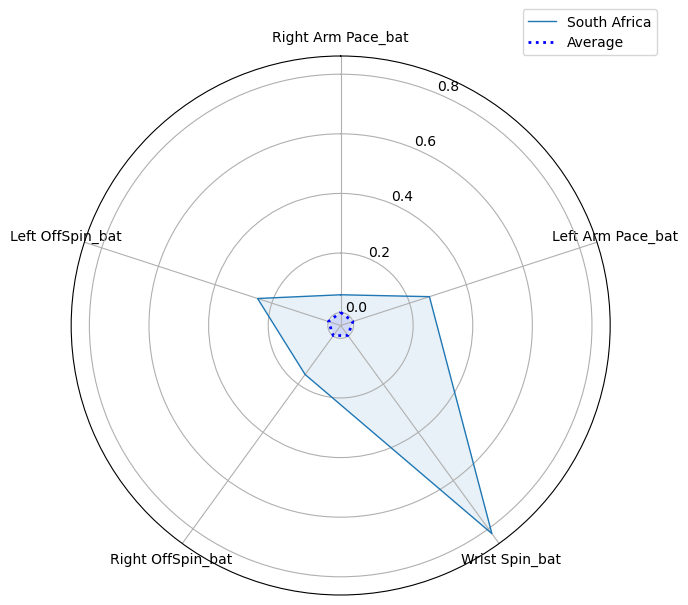

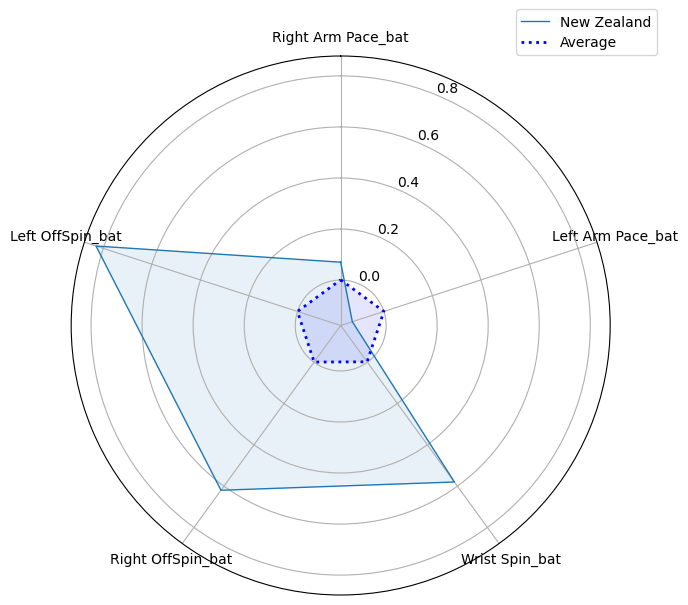

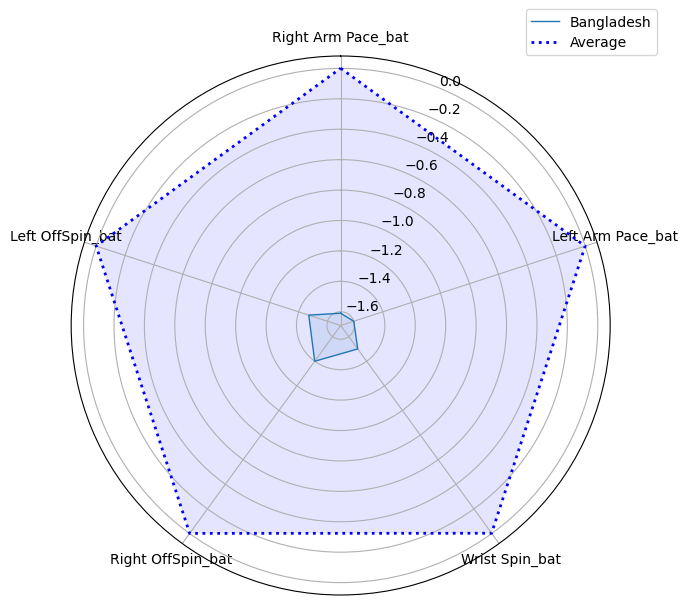

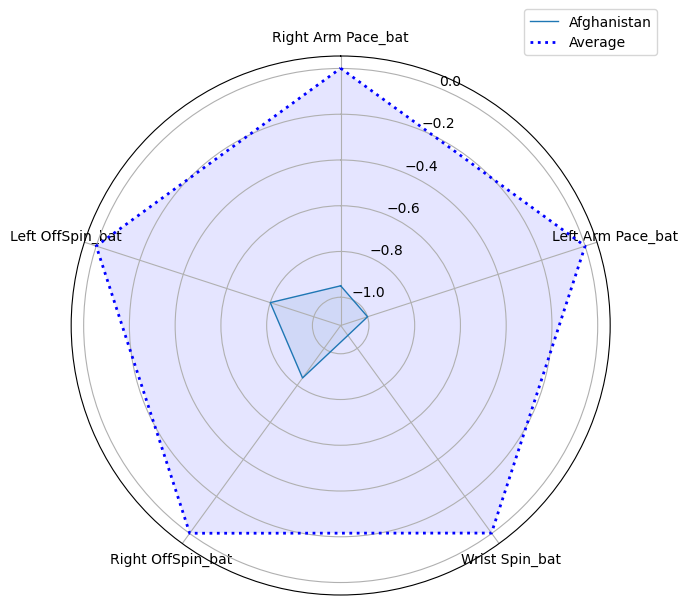

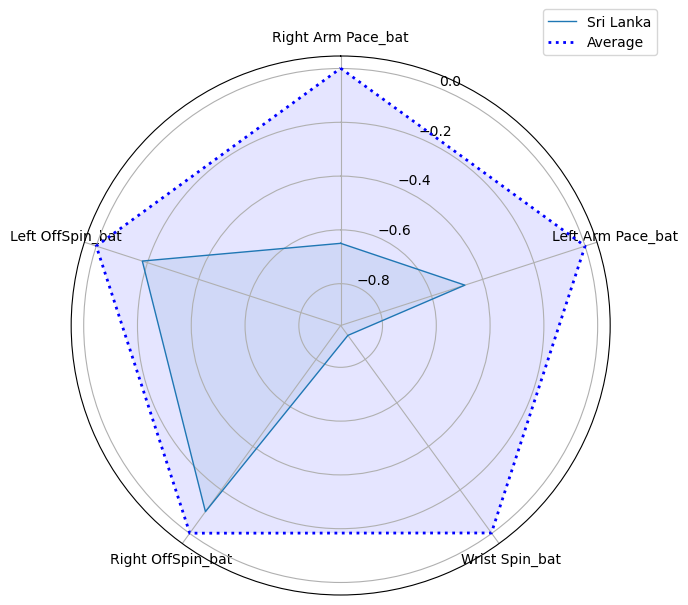

In [89]:
for country in df3_batting_vs_bowltype.index:
    spider_plot_stats(df3_batting_vs_bowltype,country)